In [1]:
import tadasets, ripser, persim
import matplotlib.pyplot as plt
import numpy as np
import greedy_sketch as gs
from voronoi import Voronoi

(2000, 3)


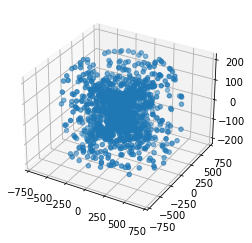

In [2]:
c = [11,25,50,75,100,200,250,300,400,500]
a = [5,10,25,50,75,100,125,150,175,200]

points = np.empty((0,3))
for i in range(10):
    points = np.append(points, tadasets.torus(n=200, c=c[i], a=a[i]), axis=0)

print(points.shape)
fig = plt.figure()
ax= plt.axes(projection='3d')
ax.scatter(points.T[0], points.T[1], points.T[2])

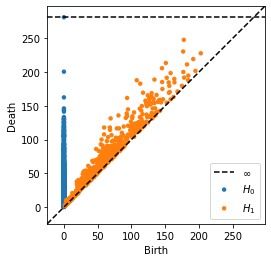

In [3]:
rips= ripser.ripser(points)
persim.plot_diagrams(rips['dgms'], show=True)

In [4]:
dgm = [[229.7297821, 245.43217468], [221.8276825, 241.50553894], [197.47032166, 198.62571716], [  2.26492929, 2.43465281], [  2.12078094, 2.37112904], [  1.99872363, 2.16104507]]

In [9]:
crap["voronoi"]

array([[[  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ]],

       [[  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ]],

       [[  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ]],

       ...,

       [[  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ]],

       [[  0.  

In [30]:
#perm, dist = gs.naive_greedy_perm(rips['dgms'][1], n=len(rips['dgms'][1]))
crap = gs.naive_greedy_sketch(rips['dgms'][1], n=15, minimal=False)
#crap = gs.naive_greedy_sketch(dgm, n =5, minimal = False)
sketches = crap['sketches']
perm = crap['perm']
dist = crap['dist']
transport_plans = crap['transport_plans']
voronoi = crap['voronoi']

In [60]:
from matplotlib import animation
from matplotlib.widgets import Button
from IPython.display import HTML

fig = plt.figure()
voronoi_dia = Voronoi()
orig_pts = rips["dgms"][1]
graph = plt.scatter([point[0] for point in orig_pts], [point[1] for point in orig_pts], s=5)
random_color = lambda: np.random.rand(3) * 0.5 + 0.5
point_colors = {
    tuple(point): random_color() for point in perm
}
# Diagonal
point_colors[(0,0)] = random_color()


def init_animation():
    # Draw diagonal
    persim.plot_diagrams(np.zeros((1, 2)), xy_range=[0, 300, 0, 300], show=False, legend=False)
    plt.close()

pts = rips["dgms"][1].tolist()   
def animate(frame):
    # Add the sketch point
    pts.append(perm[frame].tolist())
    voronoi_dia.add_point(perm[frame].tolist())
    
    xs = [x for x, y in pts]
    ys = [y for x, y in pts]
    graph.set_offsets(np.vstack((xs, ys)).T)
    graph.set_facecolors(
        # Color other points based on their nearest neighbor
        [point_colors[tuple(voronoi[frame][i])] for i, _pt in enumerate(orig_pts)]
        # Color all old sketch points
        + ["black"] * frame
        # Color new sketch point
        + ["red"]
    )
    graph.set_sizes(
        # Make other points small
        [5] * len(orig_pts)
        # Make sketch points large
        + [20] * (frame + 1)
    )

anim = animation.FuncAnimation(fig, animate, init_func=init_animation, frames=15, interval=500)

# axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
# bnext = Button(axnext, 'Next')?

# anim.save("demo.gif")
HTML(anim.to_jshtml())

In [7]:
print(transport_plans)

[defaultdict(<class 'int'>, {(0.0, 0.0): -5, (81.01005554199219, 146.516845703125): 5}), defaultdict(<class 'int'>, {(0.0, 0.0): -13, (133.58033752441406, 192.33380126953125): 13}), defaultdict(<class 'int'>, {(133.58033752441406, 192.33380126953125): -4, (121.02957153320312, 168.4571075439453): 8, (0.0, 0.0): -3, (81.01005554199219, 146.516845703125): -1}), defaultdict(<class 'int'>, {(0.0, 0.0): -17, (61.23486328125, 108.34546661376953): 17}), defaultdict(<class 'int'>, {(0.0, 0.0): -5, (164.6438446044922, 206.6305389404297): 7, (133.58033752441406, 192.33380126953125): -2}), defaultdict(<class 'int'>, {(0.0, 0.0): -2, (102.8111343383789, 147.59950256347656): 5, (121.02957153320312, 168.4571075439453): -1, (81.01005554199219, 146.516845703125): -2}), defaultdict(<class 'int'>, {(0.0, 0.0): -5, (82.27721405029297, 123.43429565429688): 6, (81.01005554199219, 146.516845703125): -1}), defaultdict(<class 'int'>, {(0.0, 0.0): -4, (28.142038345336914, 65.89946746826172): 4}), defaultdict(<c

In [8]:
more_crap = gs.naive_greedy_sketch(rips['dgms'][1])
#crap = gs.naive_greedy_sketch(dgm, n =5, minimal = False)
sketches = more_crap['sketches']
transport_plans = more_crap['transport_plans']

In [9]:
print(len(sketches))
print(len(transport_plans))

801
801


In [10]:
print(transport_plans)

[defaultdict(<class 'int'>, {(0.0, 0.0): -5, (81.01005554199219, 146.516845703125): 5}), defaultdict(<class 'int'>, {(0.0, 0.0): -13, (133.58033752441406, 192.33380126953125): 13}), defaultdict(<class 'int'>, {(133.58033752441406, 192.33380126953125): -4, (121.02957153320312, 168.4571075439453): 8, (0.0, 0.0): -3, (81.01005554199219, 146.516845703125): -1}), defaultdict(<class 'int'>, {(0.0, 0.0): -17, (61.23486328125, 108.34546661376953): 17}), defaultdict(<class 'int'>, {(0.0, 0.0): -5, (164.6438446044922, 206.6305389404297): 7, (133.58033752441406, 192.33380126953125): -2}), defaultdict(<class 'int'>, {(0.0, 0.0): -2, (102.8111343383789, 147.59950256347656): 5, (121.02957153320312, 168.4571075439453): -1, (81.01005554199219, 146.516845703125): -2}), defaultdict(<class 'int'>, {(0.0, 0.0): -5, (82.27721405029297, 123.43429565429688): 6, (81.01005554199219, 146.516845703125): -1}), defaultdict(<class 'int'>, {(0.0, 0.0): -4, (28.142038345336914, 65.89946746826172): 4}), defaultdict(<c